###### I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [234]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [190]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)

In [191]:
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1


In [298]:
#converting float value to int value
dta['rate_marriage']=dta.rate_marriage.round(0).astype(int)
dta['religious']=dta.religious.round(0).astype(int)
dta['educ']=dta.educ.round(0).astype(int)
dta['occupation']=dta.occupation.round(0).astype(int)
dta['occupation_husb']=dta.occupation_husb.round(0).astype(int)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,...,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_husb_2,occupation_husb_3,occupation_husb_4,occupation_husb_5,occupation_husb_6
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,...,1,0,0,0,0,0,0,0,1,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,...,0,1,0,0,0,0,0,1,0,0


[]

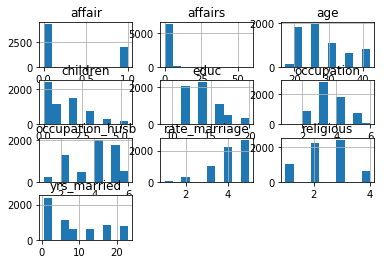

In [197]:
#Generate hsitogram
dta.hist()
plt.plot()

In [199]:
#check null values
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [200]:
#rate_marriage is a categorical column
marr_dum= pd.get_dummies(dta.rate_marriage,prefix='rate_marriage').iloc[:,1:]
dta=pd.concat([dta,marr_dum],axis=1)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,0,1,0,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,0,1,0,0


In [201]:
#religious is a categorical column
rel_dum= pd.get_dummies(dta.religious,prefix='religious').iloc[:,1:]
dta=pd.concat([dta,rel_dum],axis=1)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,rate_marriage_2,rate_marriage_3,rate_marriage_4,rate_marriage_5,religious_2,religious_3,religious_4
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,0,1,0,0,0,1,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,0,1,0,0,0,0,0


In [202]:
#educ_dum is a categorical column
educ_dum= pd.get_dummies(dta.educ,prefix='educ').iloc[:,1:]
dta=pd.concat([dta,educ_dum],axis=1)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,...,rate_marriage_4,rate_marriage_5,religious_2,religious_3,religious_4,educ_12,educ_14,educ_16,educ_17,educ_20
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,...,0,0,0,1,0,0,0,0,1,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,...,0,0,0,0,0,0,1,0,0,0


In [203]:
#educ_dum is a categorical column
occu_dum= pd.get_dummies(dta.occupation,prefix='occupation').iloc[:,1:]
dta=pd.concat([dta,occu_dum],axis=1)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,...,educ_12,educ_14,educ_16,educ_17,educ_20,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,...,0,0,0,1,0,1,0,0,0,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,...,0,1,0,0,0,0,1,0,0,0


In [204]:
#educ_dum is a categorical column
occuhub_dum= pd.get_dummies(dta.occupation_husb,prefix='occupation_husb').iloc[:,1:]
dta=pd.concat([dta,occuhub_dum],axis=1)
dta.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,...,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,occupation_husb_2,occupation_husb_3,occupation_husb_4,occupation_husb_5,occupation_husb_6
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1,...,1,0,0,0,0,0,0,0,1,0
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1,...,0,1,0,0,0,0,0,1,0,0


Text(0,0.5,'Frequency')

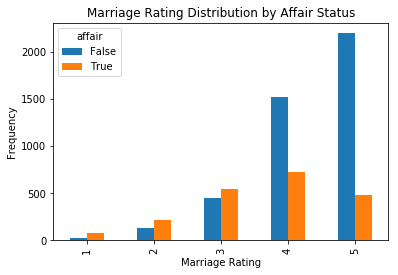

In [205]:
pd.crosstab(dta['rate_marriage'], dta['affair'].astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

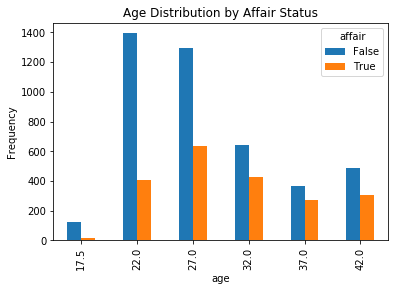

In [206]:
pd.crosstab(dta.age, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Age Distribution by Affair Status')
plt.xlabel('age')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

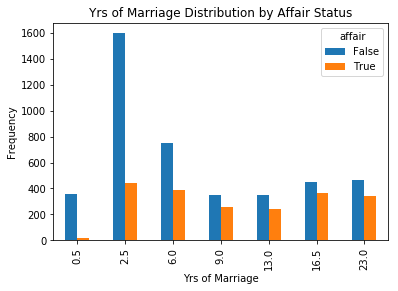

In [207]:
pd.crosstab(dta.yrs_married, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Yrs of Marriage Distribution by Affair Status')
plt.xlabel('Yrs of Marriage')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

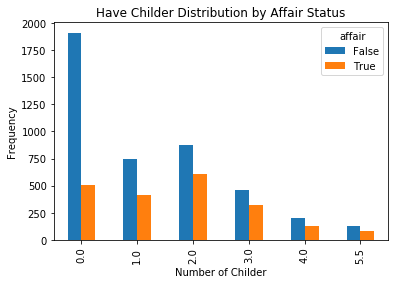

In [208]:
pd.crosstab(dta.children, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Have Childer Distribution by Affair Status')
plt.xlabel('Number of Childer')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

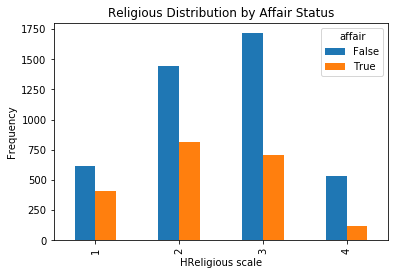

In [209]:
pd.crosstab(dta.religious, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Religious Distribution by Affair Status')
plt.xlabel('HReligious scale')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

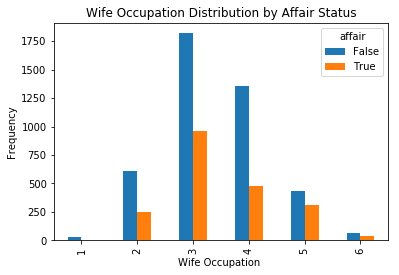

In [210]:
pd.crosstab(dta.occupation, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Wife Occupation Distribution by Affair Status')
plt.xlabel('Wife Occupation ')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

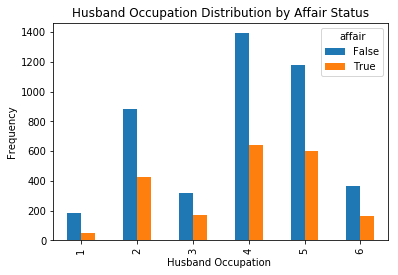

In [211]:
pd.crosstab(dta.occupation_husb, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Husband Occupation Distribution by Affair Status')
plt.xlabel('Husband Occupation ')
plt.ylabel('Frequency')

In [212]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair', 'rate_marriage_2',
       'rate_marriage_3', 'rate_marriage_4', 'rate_marriage_5', 'religious_2',
       'religious_3', 'religious_4', 'educ_12', 'educ_14', 'educ_16',
       'educ_17', 'educ_20', 'occupation_2', 'occupation_3', 'occupation_4',
       'occupation_5', 'occupation_6', 'occupation_husb_2',
       'occupation_husb_3', 'occupation_husb_4', 'occupation_husb_5',
       'occupation_husb_6'],
      dtype='object')

In [299]:
X = dta[['rate_marriage_2','rate_marriage_3','rate_marriage_4','rate_marriage_5','age','yrs_married','children','religious_2','religious_3','religious_4','educ_12','educ_14','educ_16','educ_17','educ_20','occupation_2','occupation_3','occupation_4','occupation_5','occupation_6','occupation_husb_2','occupation_husb_3','occupation_husb_4','occupation_husb_5','occupation_husb_6']]
y=dta['affair']

In [215]:
model= LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
model.score(X,y)

0.7287150486961985

In [300]:
y.mean()
#This implies 32% women has affair

0.3224945020420987

In [301]:
X.columns, np.transpose(model.coef_)

(Index(['rate_marriage_2', 'rate_marriage_3', 'rate_marriage_4',
        'rate_marriage_5', 'age', 'yrs_married', 'children', 'religious_2',
        'religious_3', 'religious_4', 'educ_12', 'educ_14', 'educ_16',
        'educ_17', 'educ_20', 'occupation_2', 'occupation_3', 'occupation_4',
        'occupation_5', 'occupation_6', 'occupation_husb_2',
        'occupation_husb_3', 'occupation_husb_4', 'occupation_husb_5',
        'occupation_husb_6'],
       dtype='object'), array([[-0.18222256],
        [-0.53695394],
        [-1.41707101],
        [-2.14065646],
        [-0.05756826],
        [ 0.1063625 ],
        [ 0.0140158 ],
        [-0.31261976],
        [-0.62061226],
        [-1.26461921],
        [ 0.11984217],
        [ 0.30909278],
        [ 0.05614412],
        [ 0.2018388 ],
        [ 0.06617552],
        [ 0.15612273],
        [ 0.42497709],
        [ 0.24015522],
        [ 0.77439392],
        [ 0.86913211],
        [ 0.16324437],
        [ 0.25952   ],
        [ 0.1313974

###### Model Validation using Using Validation set

In [270]:
#Evaluate the model by splitting into test and training dataset
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.3)

In [271]:
#train the model using training dataset
model1= LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
X_test.columns,model1.coef_

(Index(['rate_marriage_2', 'rate_marriage_3', 'rate_marriage_4',
        'rate_marriage_5', 'age', 'yrs_married', 'children', 'religious_2',
        'religious_3', 'religious_4', 'educ_12', 'educ_14', 'educ_16',
        'educ_17', 'educ_20', 'occupation_2', 'occupation_3', 'occupation_4',
        'occupation_5', 'occupation_6', 'occupation_husb_2',
        'occupation_husb_3', 'occupation_husb_4', 'occupation_husb_5',
        'occupation_husb_6'],
       dtype='object'),
 array([[-0.15778291, -0.46049526, -1.35339315, -2.06807943, -0.05447479,
          0.10634787, -0.0128128 , -0.24241595, -0.560232  , -1.14878512,
         -0.04040454,  0.11742773, -0.09076851,  0.06054661, -0.05827157,
          0.26192786,  0.50145998,  0.27780324,  0.80742811,  0.80125903,
          0.10373445,  0.24200434,  0.05790086,  0.14113848,  0.13483215]]))

In [292]:
model1.score(X_test,y_test)

0.7450261780104712

In [294]:
#get the precition from model
y_pred= model1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7450261780104712


In [273]:
confusion_matrix(y_test,y_pred)

array([[1188,  127],
       [ 360,  235]])

In [275]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83      1315
          1       0.65      0.39      0.49       595

avg / total       0.73      0.75      0.72      1910



###### Evaluate the model using cross validation

In [296]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([0.71786834, 0.70689655, 0.74451411, 0.72012579, 0.70283019,
        0.73899371, 0.70440252, 0.71069182, 0.75943396, 0.76572327]),
 0.7271480254726839)